In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

def load_data():
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    return x_train, x_test

def add_noise(images):
    noisy_images = np.array([random_noise(img, mode='gaussian', var=0.01) for img in images])
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())
    return autoencoder

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 394ms/step - loss: 0.1186 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 174s 370ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 366ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 380ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 368ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 365ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 370ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 173s 369ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 175s 374ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 377ms/step - loss: 0.1123 - val_loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Averag

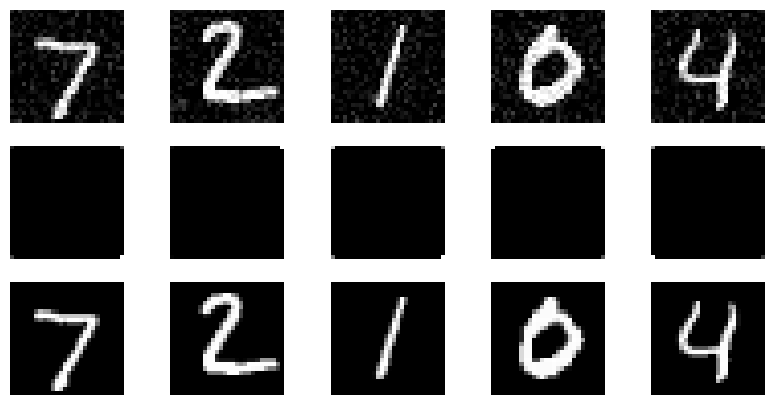

In [ ]:
x_train, x_test = load_data()
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

autoencoder = build_autoencoder()
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

predicted_images = autoencoder.predict(x_test_noisy)

psnr_values = [psnr(x_test[i], predicted_images[i]) for i in range(10)]
print("Average PSNR:", np.mean(psnr_values))

n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(predicted_images[i].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 779s 498ms/step - accuracy: 0.1237 - loss: 3.8528 - val_accuracy: 0.2689 - val_loss: 2.9660
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 774s 495ms/step - accuracy: 0.2350 - loss: 3.1300 - val_accuracy: 0.2994 - val_loss: 2.8124
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 772s 494ms/step - accuracy: 0.2560 - loss: 3.0096 - val_accuracy: 0.3138 - val_loss: 2.7334
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 772s 494ms/step - accuracy: 0.2704 - loss: 2.9279 - val_accuracy: 0.3266 - val_loss: 2.6912
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 780s 480ms/step - accuracy: 0.2787 - loss: 2.8874 - val_accuracy: 0.3271 - val_loss: 2.6556
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 745s 477ms/step - accuracy: 0.2926 - loss: 2.8293 - val_accuracy: 0.3357 - val_loss: 2.6182
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 767s 491ms/step - accuracy: 0.2931 - loss: 2.8018 - val_accuracy: 0.3388 - val_loss: 2.6103
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 801s 490ms/step - accuracy: 0.3

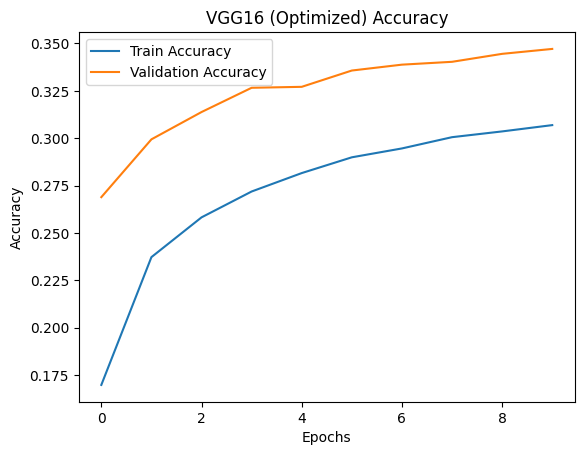

VGG16 Training Time: 7759.15 seconds


In [4]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

num_classes = 100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = datagen.flow(x_train, y_train, batch_size=32)

def train_model(model, train_generator, x_test, y_test, epochs=10):
    start_time = time.time()
    history = model.fit(train_generator, epochs=epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    inference_time = end_time - start_time
    return history, inference_time

vgg16_history, vgg16_time = train_model(model, train_generator, x_test, y_test)

def plot_metrics(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(vgg16_history, 'VGG16 (Optimized) Accuracy')

print(f"VGG16 Training Time: {vgg16_time:.2f} seconds")